In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Ford Bikes Rental Visualization and Factors affecting

## Investigation Overview

In this investigation, I wanted to look at the characteristics of Ford bike rentl trips and characterstics that could be used to predict their prices, trip duration and most traffic hours. The main focus was on the below six Characterstica : 
  * duration_sec
  * start_time
  * end_time
  * user_type
  * start_station_name
  * end_station_name

## Dataset Overview

The data consisted of prices and attributes of approximately 183,412 trips. The attributes included the characterstics such as : duration_sec, tart_time, end_time, user_type, start_station_name and end_station_namefour. Eight thousand four hundred and sixty two data points were removed from the analysis due to inconsistencies or missing information.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import glob
import os

%matplotlib inline


In [3]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('/content/drive/MyDrive/Utkarsh doc/201902-fordgobike-tripdata.csv')

In [4]:
df.shape

(183412, 16)

In [5]:
#changing datatype of 'start_time' & 'end_time' into datetime object
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)


In [6]:
#extract the hours from start time 
df['start_time_hours']=df['start_time'].dt.hour
#extract the minute from start time 
df['start_time_minutes']=df['start_time'].dt.minute + df['start_time_hours']*60

In [7]:
#extract the hours from end time 
df['end_time_hours']=df['end_time'].dt.hour
#extract the minute from end time 
df['end_time_minutes']=df['end_time'].dt.minute + df['start_time_hours']*60

In [8]:
df['month']=df.start_time.dt.month

In [9]:
df.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                  float64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                          object
member_birth_year                 float64
member_gender                      object
bike_share_for_all_trip            object
start_time_hours                    int64
start_time_minutes                  int64
end_time_hours                      int64
end_time_minutes                    int64
month                               int64
dtype: object

In [10]:
#dropping irrelevant columns
df.drop(['start_station_latitude', 'start_station_longitude','end_station_latitude', 'end_station_longitude'] ,axis =1 , inplace = True)

In [11]:
df=df.dropna()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   end_station_id           174952 non-null  float64       
 6   end_station_name         174952 non-null  object        
 7   bike_id                  174952 non-null  int64         
 8   user_type                174952 non-null  object        
 9   member_birth_year        174952 non-null  float64       
 10  member_gender            174952 non-null  object        
 11  bike_share_for_all_trip  174952 non-null  object        
 12  start_time_hours

In [13]:
df.isna().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
end_station_id             0
end_station_name           0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
start_time_hours           0
start_time_minutes         0
end_time_hours             0
end_time_minutes           0
month                      0
dtype: int64

In [14]:
df.to_csv("fordbike_engineered.csv")

## Distribution of Users : Subscribers/Customers

Bike Rides in the dataset take on a very large range of trips, from about 183,412 trips. Plotted on a boxplot, the distribution of diamond prices takes on ratio of users between the two categories. 
## This illustrates that significant number of users are Subscribers rather than normal customers.

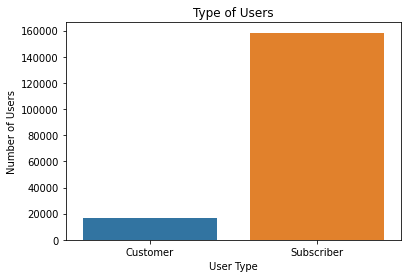

In [15]:
#BoxPlot representing User Type : Customer/Subscriber
sb.countplot(data=df,x='user_type')
plt.title("Type of Users")
plt.xlabel('User Type')
plt.ylabel('Number of Users')
plt.show()

## Distribution journey origination frquency of all stations.

Trip in the given dataset originate at 'Market St. at 10th St.' followed by: 'San francisco Caltrain Station 2' and  'Berry St. at 4th St.'
## Below bargraph ilustrates the above conclusion

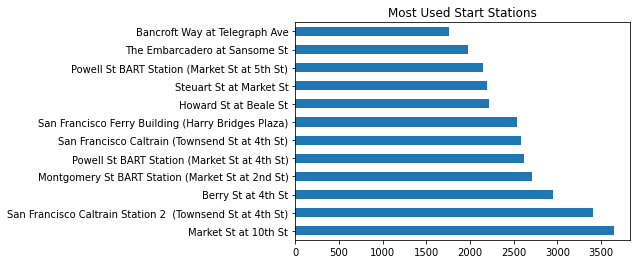

In [16]:
#A Barchart for depicting journey origination frquency of all stations. 
df.start_station_name.value_counts()[:12].plot(kind='barh')
plt.title('Most Used Start Stations')
plt.show()

Text(0, 0.5, 'Duration "seconds"')

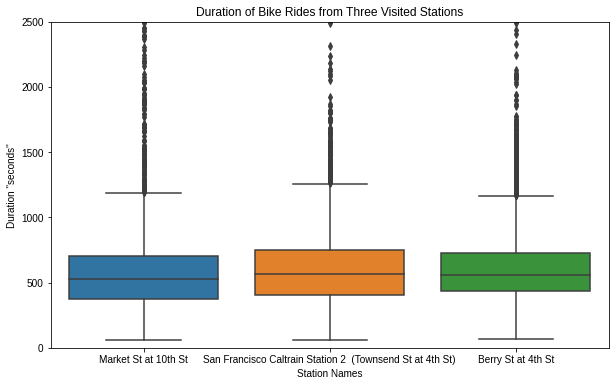

In [17]:
#boxplot for trip duration analysis of journeys from top three most used stations.
start=df['start_station_name'].value_counts().index[:3]
s_stations = df.loc[df['start_station_name'].isin(start)]

plt.figure(figsize=(10,6))
sb.boxplot(data = s_stations, x='start_station_name', y='duration_sec')
plt.ylim(0, 2500)
plt.style.use('seaborn')
plt.title('Duration of Bike Rides from Three Visited Stations')
plt.xlabel('Station Names')
plt.ylabel('Duration "seconds"')

## Distribution journey conclusion frquency of all stations.

Trip in the given dataset originate at 'San francisco Caltrain Station 2' followed by: 'Market St. at 10th St. and  'Montgomery St. BART St.'
## Below bargraph ilustrates the above conclusion

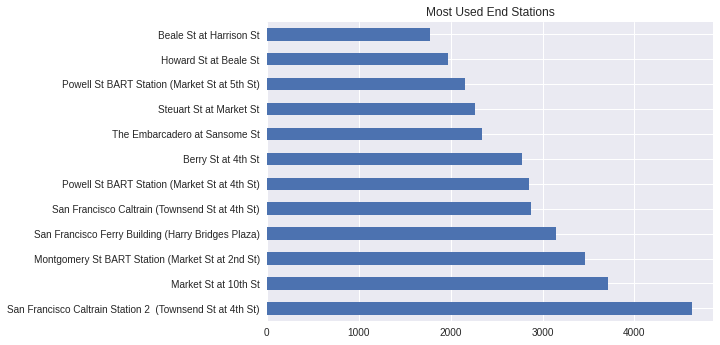

In [18]:
#A Barchart for depicting journey conclusion frquency of all stations. 
df.end_station_name.value_counts()[:12].plot(kind='barh')
plt.title('Most Used End Stations')
plt.show()

Text(0, 0.5, 'Duration "seconds"')

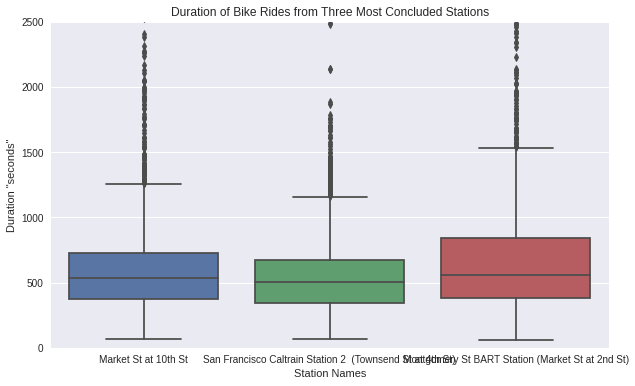

In [19]:
#boxplot for trip duration analysis of journeys from top three most used stations.
start=df['end_station_name'].value_counts().index[:3]
e_stations = df.loc[df['end_station_name'].isin(start)]

plt.figure(figsize=(10,6))
sb.boxplot(data = e_stations, x='end_station_name', y='duration_sec')
plt.ylim(0, 2500)
plt.style.use('seaborn')
plt.title('Duration of Bike Rides from Three Most Concluded Stations')
plt.xlabel('Station Names')
plt.ylabel('Duration "seconds"')

## Distribution of Passengers over 24 hrs 

Graphs suggest, bigger number of users prefer ride bike in the morning at 8. On the other hand, the users end the trip usually at 5 pm.

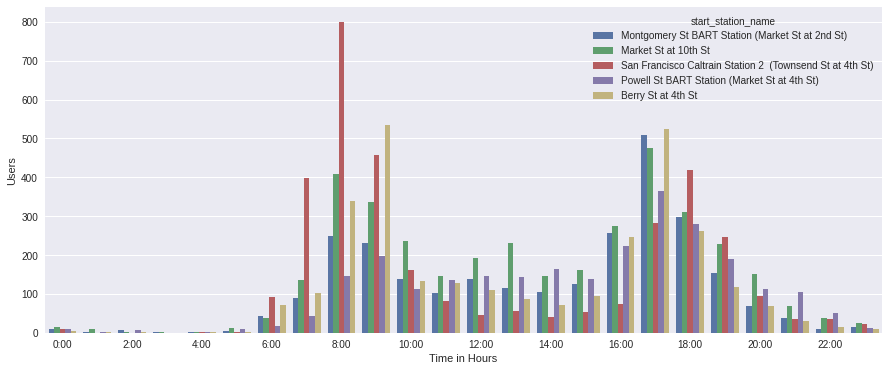

In [20]:
start=df['start_station_name'].value_counts().index[:5]
s_stations = df.loc[df['start_station_name'].isin(start)]
plt.figure(figsize = (15,6))
sb.countplot(data=s_stations, x='start_time_hours', hue='start_station_name')
x_tick= np.arange(0,24,2)
x_label= [str(x)+":00" for x in x_tick]
plt.xticks(x_tick, x_label)
plt.xlabel('Time in Hours')
plt.ylabel('Users')
plt.show()

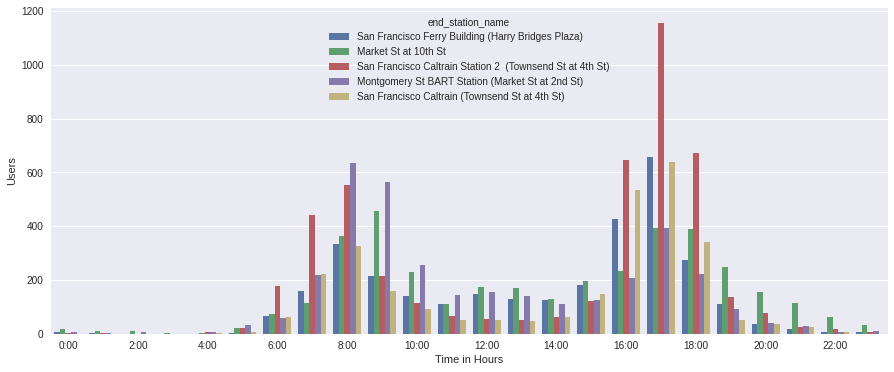

In [21]:
end= df['end_station_name'].value_counts().index[:5]
e_stations = df.loc[df['end_station_name'].isin(end)]
plt.figure(figsize = (15,6))
sb.countplot(data=e_stations, x='end_time_hours', hue='end_station_name')
x_tick= np.arange(0,24,2)
x_label= [str(x)+":00" for x in x_tick]
plt.xticks(x_tick, x_label)
plt.xlabel('Time in Hours')
plt.ylabel('Users')
plt.show()

## Which Gender type comprises most of our Users?
Below BarPlot shows,
  * "Male" users dominate in number, with a total of 135000(approx) Users.
  * "Female" users fall 2nd in count ratio, with a total number close to 40000.
  * Users of "Other" gender type are least in number. Their total number lies close to 3000 users.

In [22]:
#Function to plot Univariate Barplots with specified X-Label.
def funcbarplot(df, x):
  mg=df.groupby(x).size()
  plt.figure(figsize = (10, 5))
  sb.barplot(x = mg.index, y = mg.values)
  plt.title(f"{x} Ratio")
  plt.xlabel(f'{x} Type')
  plt.ylabel('Number of Members')
  plt.show()

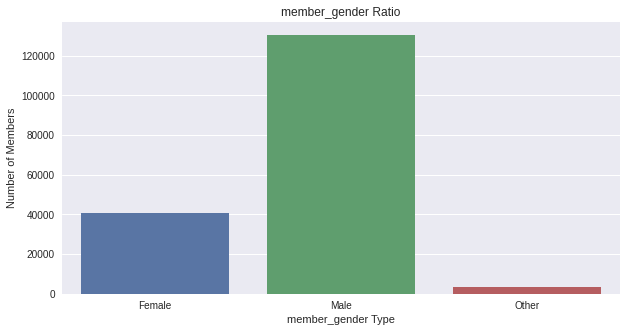

In [23]:
#BarPlot representing member gender ratio
funcbarplot(df,'member_gender')

## Trip sharing tendency of Users of different gender types.
**No** , We can clearly see, majority of our users do not preffer sharing their rides with other users.

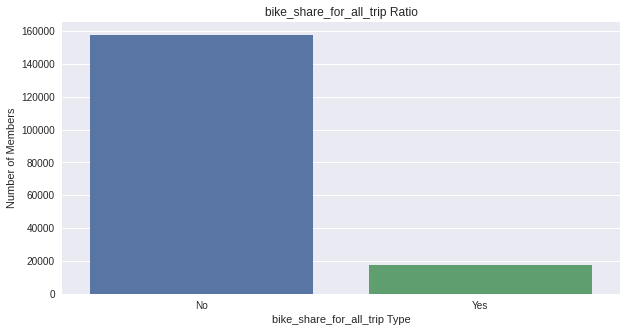

In [31]:
#BarPlot representing over all member's gender wise tendency of sharing trips
funcbarplot(df,'bike_share_for_all_trip')

In [25]:
#Function to plot Bike Sharing Tendency of users
def funcMemberG(df,x):
  df['Memberg'] = df['member_gender'].mask(df['member_gender'].ne(x))
  df.groupby(['bike_share_for_all_trip'])['Memberg'].count().plot.bar()

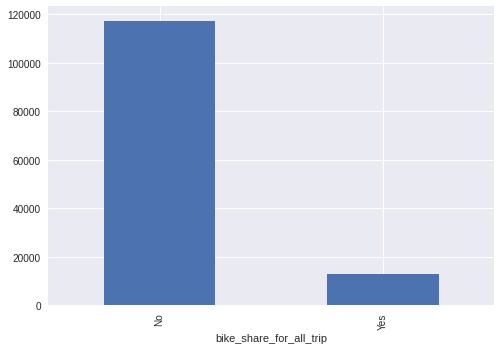

In [26]:
#Function to Plot Bike Sharing Tendency of MALE users
funcMemberG(df,"Male")

We can clearly infer, 
  * Users with "Male" gender type are dominant in number.
  * Their total number is close to 120000 users.
  * Approximately 17500 Users of "Male" gender preffer to share their ride.
  * Above given point indicates that such users have medium tendancy of all three genders to share their ride. Since approximately 1/6th of them share their ride.

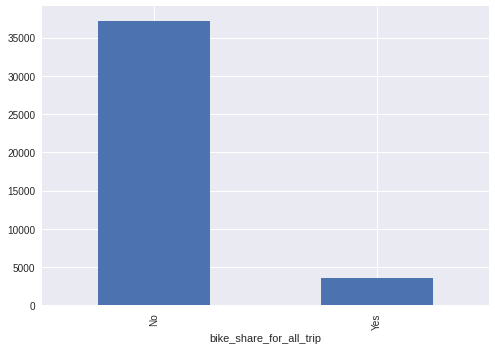

In [27]:
#Function to Plot Bike Sharing Tendency of FEMALE users
funcMemberG(df,"Female")

We can clearly infer, 
  * Users with "Female" gender type are less in number than "Male" users.
  * Their total number is close to 37500 users.
  * Approximately 4000 Users of "Female" gender preffer to share their ride.
  * Above given point indicates that such users have least tendancy to share their ride. Since approximately only 1/9th of them share their ride.

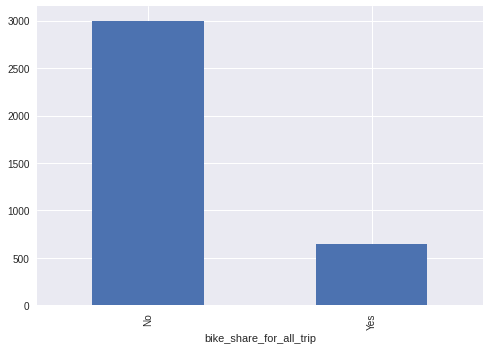

In [28]:
#Function to Plot Bike Sharing Tendency of OTHER users
funcMemberG(df,"Other")

We can clearly infer, 
  * Users with "Other" gender type are least in number.
  * Their total number is close to 3000 users.
  * Approximately 600 Users of "Other" gender preffer to share their ride.
  * Above given point indicates that such users have maximum tendancy to share their ride. Since approximately 1/5th of them share their ride.

##Trip duration tendency of Users of different gender types.

We can clearly infer,
  * Users of "Other" gender type tend to have longer trip duration.
  * Female users travel more than Male users.
  * Men tend to have travel for least duration. (We are all the same and lazy !)

In [29]:
#Function to Plot Trip Duration Mean for Each Gender
def funcplot(df, x):
  plt.figure(figsize = (10, 5))
  df.groupby(['member_gender'])[x].mean().plot.bar()
  plt.title(f'{x} VS Member Gender Bar Graph')
  plt.xlabel('Member Gender')
  plt.ylabel(f'{x}')
  plt.show()

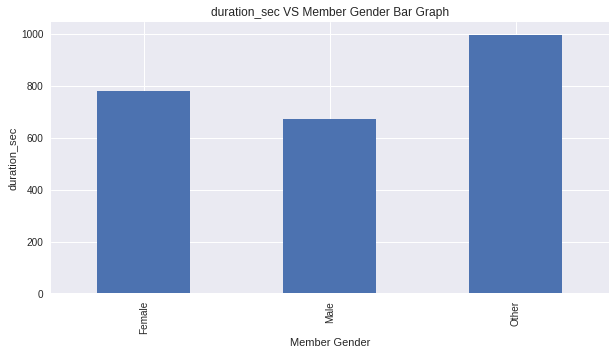

In [30]:
funcplot(df,'duration_sec')